# CommonLit Readability Prize

## Preparation

### Dependencies

In [33]:
%pip install kaggle pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 59.0/59.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
  Running setup.py install for kaggle: started
  Running setup.py install for kaggle: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: kaggle is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


### Download dataset

In [44]:
# !kaggle competitions download -c commonlitreadabilityprize
!python -m kaggle competitions download -c commonlitreadabilityprize


  0%|          | 0.00/1.13M [00:00<?, ?B/s]
 88%|████████▊ | 1.00M/1.13M [00:00<00:00, 5.90MB/s]
100%|██████████| 1.13M/1.13M [00:00<00:00, 6.58MB/s]


In [47]:
from zipfile import ZipFile

with ZipFile("./commonlitreadabilityprize.zip", 'r') as zr:
    zr.extractall("./commonlitreadabilityprize")

### Imports

In [48]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Explore

### Load data

In [16]:
df = pd.read_csv("./commonlitreadabilityprize/train.csv")
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [17]:
df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


<AxesSubplot: >

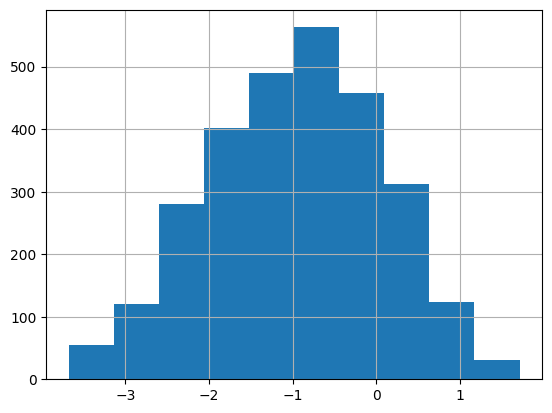

In [18]:
df["target"].hist()

<AxesSubplot: >

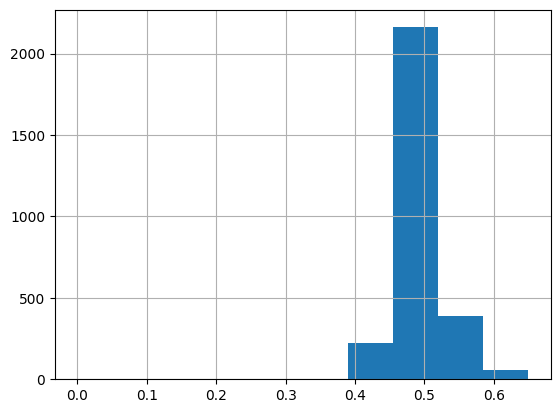

In [19]:
df["standard_error"].hist()

## Train Model

### Build model pipeline

In [60]:
model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("svr", GradientBoostingRegressor())
])

### Train Model


In [61]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [62]:
model.fit(df_train["excerpt"], df_train["target"])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svr', GradientBoostingRegressor())])

### Metrics

train RMSE:

In [66]:
print("%.2f" % mean_squared_error(df_train["target"], model.predict(df_train["excerpt"]), squared=False))

0.62


test RMSE:

In [67]:
print("%.2f" % mean_squared_error(df_test["target"], model.predict(df_test["excerpt"]), squared=False))

0.82


> It ain't much, but it's honest work.

### Save model

In [68]:
import joblib

joblib.dump(model, "./model.joblib")

['./model.joblib']